# Simplified detection of urban types using momepy part 1
O. Kaufmann, 2024 - 2025.

Example adapted from the [SDSC 2021 Workshop](https://github.com/martinfleis/sdsc21-workshop) led by Martin Fleischmann as provided in the momey documentation. 
This example illustrates the potential of morphometrics captured by `momepy` in capturing the structure of cities. For more information, you may refer to 

> Fleischmann M, Feliciotti A, Romice O and Porta S (2021) Methodological Foundation of a Numerical Taxonomy of Urban Form. Environment and Planning B: Urban Analytics and City Science, doi: 10.1177/23998083211059835


In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important information: Execute me to activate interactive questions.

***
## 1. Import packages	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
import numpy as np
import momepy as mm

***
## 2. Import data from openstreetmap 	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>2.1 Use geocoding </b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>Check if osmnx can find Mons. What are the returned numbers?
</div>

<div class="alert alert-block alert-success">
	<b>2.2 Use osmnx to have a dataset of buildings</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>Using the <b>features_from_address</b> function of osmnx package, download the buildings in a 3km by 3km square centered on  Cuesmes from OpenStreetMap.  
    What type of object is returned by this function?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>What are the types of geometries in the dataset?
    Filter out buildings to keep Polygons only.
</div>

In [5]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e7072696e74286275696c64696e67732e67656f6d5f747970652e76616c75655f636f756e74732829293c62723e0a6275696c64696e6773203d206275696c64696e67735b6275696c64696e67732e67656f6d5f747970653d3d27506f6c79676f6e275d3c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<div class="alert alert-block alert-warning">
<b>Question 2.2.3: </b><br>What is the current CRS of the building dataset?  
    Reproject the buildings dataset in the Lambert Belge 2008 projection.
</div>

In [6]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e7072696e742866276f726967696e616c206372733a207b6275696c64696e67732e6372737d27293c62723e0a6275696c64696e6773203d206275696c64696e67735b5b2767656f6d65747279275d5d2e746f5f637273286c6f63616c5f637273293c62723e0a7072696e7428662766696e616c206372733a207b6275696c64696e67732e6372737d27293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<div class="alert alert-block alert-warning">
<b>Question 2.2.4: </b><br>Plot the buildings
</div>

<Axes: >

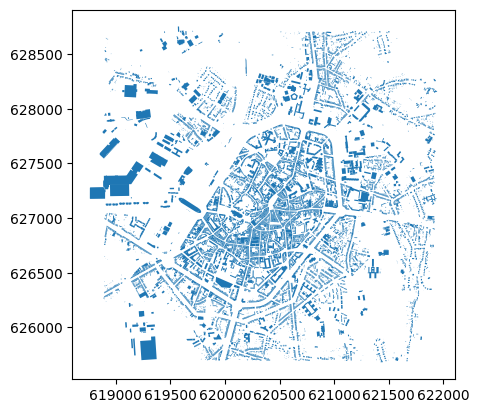

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-success">
	<b>2.3 Use osmnx to get the walkable network</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.1: </b><br>Using the same approach as for buildings, download the streets in Cuesmes from OpenStreetMap. This time, as we want to retrieve a network, use the <b>graph_from_address</b> funtion of the osmnx package. Make sure to use the "walk" network_type to extract the street network. Store the object in `osm_graph`. 
    What type of object is returned by this function?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.2: </b><br>Check the CRS of `osm_graph` and reproject the graph into the Lambert Belge 2008 projection if needed.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.3: </b><br>Make a graphical representation of osm_graph.  
    Make sure to double check the type of this object to find the way to do this...
</div>

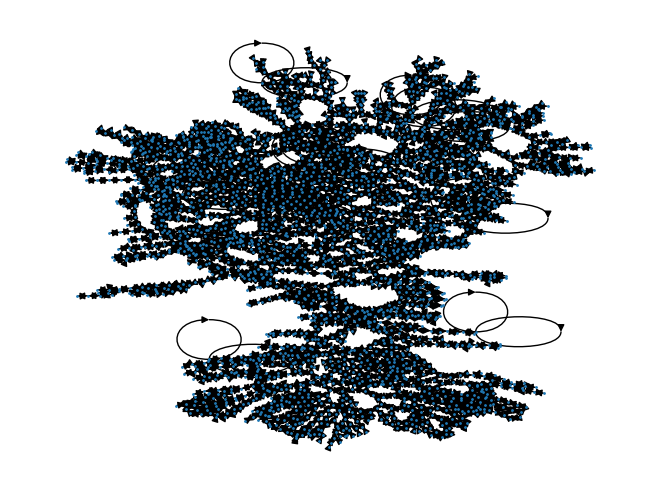

In [ ]:
# Expected outcome below...

<b>Note:</b><br>    For the later processing in momepy, we will convert the graph to a GeoDataFrame named `streets`.  <br>
    Read the way it is done hereunder and make sure you understand what is done.


In [11]:
streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(osm_graph),
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
).reset_index(drop=True)
streets.tail()

osmid      highway lanes                       name  oneway  ref  \
3921  1354464815  residential   NaN  Venelle des Hallebardiers   False  NaN   
3922  1354464817  residential   NaN            Rue du Car d'Or   False  NaN   
3923  1354464817  residential   NaN            Rue du Car d'Or   False  NaN   
3924  1354464818  residential   NaN            Rue du Car d'Or   False  NaN   
3925  1354464818  residential   NaN            Rue du Car d'Or   False  NaN   

     reversed     length         from           to  \
3921     True  67.653025  12534639947  12534639928   
3922     True  12.507663  12534639979  12534639947   
3923     True  23.923862  12534639971  12534639979   
3924    False  53.870064  12534639974  12534639979   
3925     True  42.474884  12534639974  12534639971   

                                               geometry maxspeed service  \
3921  LINESTRING (621776.098 627572.748, 621774.216 ...      NaN     NaN   
3922  LINESTRING (621787.304 627578.374, 621776.098 ...      NaN     NaN   
3923  LINESTRING (621805.829 627593.037, 621802.746 ...      NaN     NaN   
3924  LINESTRING (621819.511 627553.312, 621810.415 ...      NaN     NaN   
3925  LINESTRING (621819.511 627553.312, 621819.548 ...      NaN     NaN   

     access tunnel width junction bridge  
3921    NaN    NaN   NaN      NaN    NaN  
3922    NaN    NaN   NaN      NaN    NaN  
3923    NaN    NaN   NaN      NaN    NaN  
3924    NaN    NaN   NaN      NaN    NaN  
3925    NaN    NaN   NaN      NaN    NaN

In [ ]:

%%display_prompt --title Question 2.3.4: --prompt 486176652061206c6f6f6b206174207468652066726f6d20616e6420746f206669656c642e205768617420646f20796f75207468696e6b2069732073746f72656420696e20746865736520636f6c756d6e733f0a --answer 202020204e6f64657320696e64657820696e20746865204f534d206e6574776f726b2067726170682e
# @info: Execute me to display the question

Question 2.3.4: Have a look at the from and to field. What do you think is stored in these columns?

<div class="alert alert-block alert-warning">
<b>Question 2.3.5: </b><br>Before using this dataset, we should clean it a little bit.  
    First use <b>momepy remove_false_nodes</b> function on `streets`. What does this function?   
    Then only keep the geometry in the dataframe, we will not use the other attributes.
</div>

In [ ]:
# Expected outcome below...

geometry
0  LINESTRING (620904.3 627089.902, 620903.102 62...
1  LINESTRING (620964.936 627074.893, 620912.204 ...
2  LINESTRING (620994.76 627055.901, 620963.478 6...
3  LINESTRING (620884.913 627084.723, 620890.195 ...
4  LINESTRING (620897.821 627057.969, 620898.385 ...

<div class="alert alert-block alert-success">
	<b>2.4 Display the cleaned buidings and walkable network</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.1: </b><br>Make a map showing buildings and streets
</div>

<Axes: >

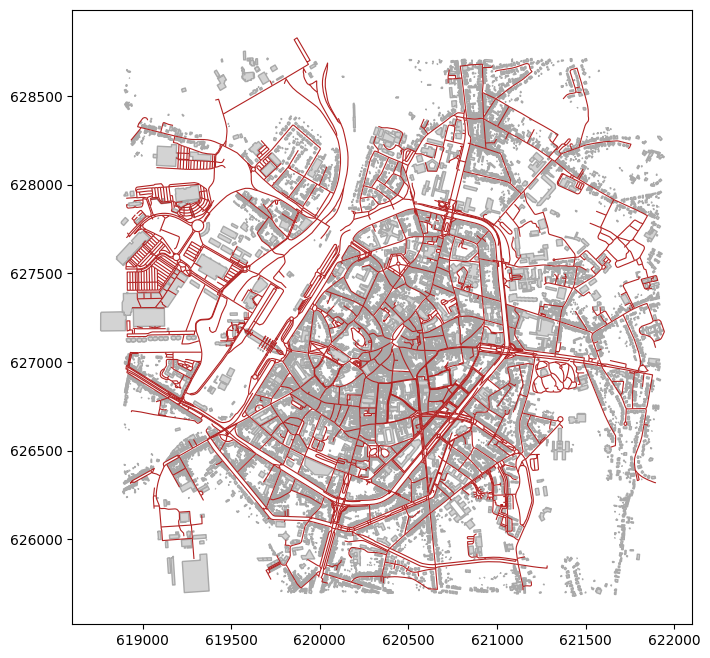

In [13]:
#
fig, ax = plt.subplots(figsize=(8,12))
buildings.plot(ax=ax, facecolor='lightgrey', edgecolor='darkgrey')
streets.plot(ax=ax, edgecolor='firebrick', linewidth=.8)

***
## 3. Prepare data for measuring morphological characters	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>3.1 Create the tessellation</b>
</div>

In [14]:
limit = mm.buffered_limit(buildings, "adaptive")

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/libpysal/graph/base.py:1375: UserWarning: The numba package is used extensively in this module to accelerate the computation of graphs. Without numba, these computations may become unduly slow on large data.
  head, tail, weights = _gabriel(


<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>What is the type of `limit` ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.2: </b><br>Read the content of the following cells and try to explain what is done and why.
</div>

In [16]:
buildings['id'] = buildings.index.get_level_values(1)
buildings2 = buildings.set_index('id')

In [17]:
tessellation = mm.morphological_tessellation(buildings2, clip=limit)

OpenStreetMap data are often problematic due to low quality of some polygons. If some collapse, we get a mismatch between the length of buildings and the length of polygons.

In [18]:
collapsed, _ = mm.verify_tessellation(tessellation, buildings2.explode())

/tmp/ipykernel_73447/2043392700.py:1: UserWarning: Tessellation does not fully match buildings. 15 element(s) disappeared during generation. Index of the affected elements: Index([1267695855, 1341962379, 1342250604, 1347435193, 1354616283, 1355569980,
       1355571596, 1355571985, 1355572523, 1358915595, 1358915597, 1358915601,
       1358915604, 1358915605, 1358915612],
      dtype='int64', name='id').
  collapsed, _ = mm.verify_tessellation(tessellation, buildings2.explode())
/tmp/ipykernel_73447/2043392700.py:1: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should  be edited. Index of affected elements: [167983540, 220138266, 225833954, 240370323, 1267695658, 1267695659, 1267879656, 1267879659, 1290723404, 1290723425, 1290723427, 1291152268, 1291161677, 1291161806, 1291367991, 1296012776, 1296012792, 1296013077, 1301287124, 1301287158, 1341948634, 1341948636, 1341948637, 1341962618, 1341962678, 1341962684, 1341962687, 1341962696, 1341962729, 1341962742, 

Better to drop affected buildings and re-create tessellation.

In [19]:
buildings2 = buildings2.drop(collapsed)
limit = mm.buffered_limit(buildings2, "adaptive")
tessellation = mm.morphological_tessellation(buildings2, clip=limit)

/home/su530201/.local/share/virtualenvs/GIS_Urban_Planning-bS-tQSLp/lib/python3.10/site-packages/libpysal/graph/base.py:1375: UserWarning: The numba package is used extensively in this module to accelerate the computation of graphs. Without numba, these computations may become unduly slow on large data.
  head, tail, weights = _gabriel(


<b>Note:</b><br>    We have to check that the number of polygons in the tessallation matches the number of buildings.


In [20]:
if tessellation.shape[0] == buildings2.shape[0]:
    buildings = buildings2
    print(f'The number of polygons in the tessellation and the number of buildings match.')
else:
    raise Exception(f'Error: mismatch between the number of polygons in the tessellation ({tessellation.shape[0]}) and the number of buildings ({buildings2.shape[0]}).')

The number of polygons in the tessellation and the number of buildings match.


<div class="alert alert-block alert-success">
	<b>3.2 Link streets</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.1: </b><br>Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.
</div>

In [21]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6275696c64696e67735b277374726565745f696e646578275d203d206d6d2e6765745f6e6561726573745f737472656574286275696c64696e67732c20737472656574732c206d61785f64697374616e63653d3130302e293c62723e0a6275696c64696e67733c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


In [ ]:
# Expected outcome below...

geometry  street_index
id                                                                         
1230908     POLYGON ((620653.207 628132.038, 620668.524 62...        1640.0
1265129     POLYGON ((620463.035 626856.265, 620470.048 62...        3604.0
1373193     POLYGON ((620740.565 626218.24, 620742.72 6262...        1125.0
1506742     POLYGON ((620358.077 626604.155, 620354.123 62...         380.0
13733864    POLYGON ((620640.275 626899.423, 620626.767 62...        3728.0
...                                                       ...           ...
1361764844  POLYGON ((619325.709 627722.093, 619329.536 62...         705.0
1371860666  POLYGON ((620749.635 628293.457, 620748.263 62...        1628.0
1371861980  POLYGON ((620685.101 628324.073, 620690.082 62...        1619.0
1377039943  POLYGON ((620954.55 628377.732, 620958.171 628...         743.0
1381488270  POLYGON ((621366.276 627315.891, 621370.243 62...        1093.0

[18307 rows x 2 columns]

<div class="alert alert-block alert-warning">
<b>Question 3.2.2: </b><br>Attach the network index to the tessellation
</div>

***
## 4. Save prepared datasets	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>4.1 Check the geodataframes and save them in a geopackage</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.1.1: </b><br>Check that your GeodataFrame "streets" contain only polygons.  
</div>

In [23]:
np.all(streets.geom_type == 'LineString')

np.True_

<div class="alert alert-block alert-warning">
<b>Question 4.1.2: </b><br>Check that your GeodataFrames "buildings" and "tessellation" have the same number of rows and a street_index column.  
</div>

In [ ]:
# Expected outcome below...

geometry  street_index
id                                                                         
1230908     POLYGON ((620653.207 628132.038, 620668.524 62...        1640.0
1265129     POLYGON ((620463.035 626856.265, 620470.048 62...        3604.0
1373193     POLYGON ((620740.565 626218.24, 620742.72 6262...        1125.0
1506742     POLYGON ((620358.077 626604.155, 620354.123 62...         380.0
13733864    POLYGON ((620640.275 626899.423, 620626.767 62...        3728.0
...                                                       ...           ...
1361764844  POLYGON ((619325.709 627722.093, 619329.536 62...         705.0
1371860666  POLYGON ((620749.635 628293.457, 620748.263 62...        1628.0
1371861980  POLYGON ((620685.101 628324.073, 620690.082 62...        1619.0
1377039943  POLYGON ((620954.55 628377.732, 620958.171 628...         743.0
1381488270  POLYGON ((621366.276 627315.891, 621370.243 62...        1093.0

[18307 rows x 2 columns]

geometry  street_index
id                                                                         
1230908     POLYGON ((620630.933 628150.934, 620631.415 62...        1640.0
1265129     POLYGON ((620504.857 626889.614, 620504.903 62...        3604.0
1373193     POLYGON ((620773.074 626260.605, 620773.179 62...        1125.0
1506742     POLYGON ((620373.884 626648.044, 620373.938 62...         380.0
13733864    POLYGON ((620643.238 626928.994, 620643.346 62...        3728.0
...                                                       ...           ...
1361764844  MULTIPOLYGON (((619391.864 627871.224, 619414....         705.0
1371860666  POLYGON ((620751.887 628309.705, 620751.965 62...        1628.0
1371861980  POLYGON ((620690.889 628327.672, 620690.922 62...        1619.0
1377039943  POLYGON ((620951.621 628386.762, 620951.805 62...         743.0
1381488270  POLYGON ((621367.389 627320.77, 621367.433 627...        1093.0

[18307 rows x 2 columns]

<div class="alert alert-block alert-warning">
<b>Question 4.1.3: </b><br>Save the "buildings", "streets" and "tessellation" GeoDataFrames in layers of a geopackage
</div>